In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Importing Dataset

In [3]:
df=pd.read_csv('/content/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.shape

(2290, 6)

In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
x=df.drop(columns='Date',axis=1)

<Axes: >

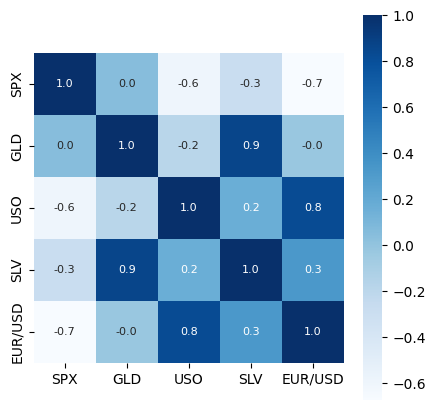

In [14]:
correlation=x.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Split the features and targets

In [17]:
x=df.drop(columns=['Date','GLD'],axis=1)
y=df['GLD']
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Split into Train and test data

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=None,random_state=2)
print(x_train.shape)
print(x_test.shape)

(2061, 4)
(229, 4)


Model Training

In [20]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [21]:
training_model_prediction=model.predict(x_train)
print(training_model_prediction)

[138.02520259 122.39479822 115.92650181 ... 130.25339655 159.53069652
 114.58699977]


In [23]:
#r_square_error
score1=metrics.r2_score(y_train,training_model_prediction)
print(score1)

score2=metrics.mean_absolute_error(y_train,training_model_prediction)
print(score2)

0.9984357679715563
0.47618546816108714


Model Testing

In [24]:
test_model_prediction=model.predict(x_test)
print(test_model_prediction)

[168.36149895  82.31290005 114.78869997 127.70040101 121.23020021
 153.92149976 149.76469695 126.22160033 117.4496988  126.00779984
 116.6894012  172.38140093 140.7980968  167.84089881 115.19410016
 117.62640077 139.23250353 169.8524004  158.99550018 154.1669002
 155.27650014 125.1827996  175.6946987  156.76370424 125.22390047
  94.2213002   77.16599968 119.94900054 119.11679924 167.56849959
  88.24060073 125.44090038  90.94640073 117.66360029 121.17709948
 135.02399938 115.40390146 115.86110112 148.32119935 107.04170111
 104.77990162  87.1228981  126.35900074 118.04139962 154.71219917
 119.83169993 108.8497993  108.13159831  93.11280026 127.07299759
  74.19880021 113.68759938 120.31359915 111.21879935 118.81119892
 120.84989992 159.47570087 166.12080107 146.62279783  86.45619951
  94.10030026  86.92369902  90.87969977 119.0245004  126.32490023
 127.44299968 168.36770047 122.30669922 117.54349886  98.45070055
 167.66180091 142.98439844 132.50560374 121.08530129 122.60939911
 119.793400

In [25]:
score_1=metrics.r2_score(y_test,test_model_prediction)

#Mean Absolute error
score_2=metrics.mean_absolute_error(y_test,test_model_prediction)

print(score_1)
print(score_2)

0.9886141513928508
1.2954591023580773


Visualizing model

In [26]:
y_test=list(y_test)

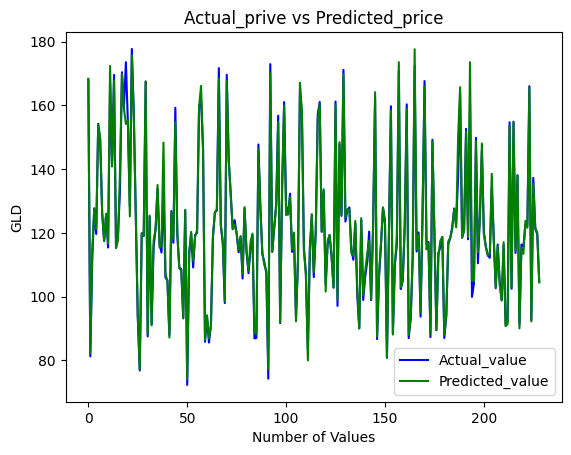

In [33]:
plt.plot(y_test,color='blue',label='Actual_value')
plt.plot(test_model_prediction,color='green',label='Predicted_value')
plt.title('Actual_prive vs Predicted_price')
plt.xlabel('Number of Values')
plt.ylabel('GLD')
plt.legend()
plt.show()